In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
root_path = "C:/Users/hilar/Documents/Data/GitHub/Vision_Cognitive_Systems_Proyect/Corn/corn2/corn_seed_counting_train_v2_clean/"


In [9]:
mode = "train" #"test" # 

if mode== "train":
    f_n = "trn"

df_i = pd.read_csv (root_path + f"{f_n}.txt" )
kernel_x = []
kernel_y = []
image_id = []
# For the info file
id_ = []
file_name = []
height =[]
width = []
counts = []

for im in range(len(df_i)):
    print("Processing image",im)
    count    = df_i.iloc[im]["count"]
    path_img = df_i.iloc[im]["path_img"]
    path_msk = df_i.iloc[im]["path_msk"]
       
    image      = cv2.imread(root_path+path_img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_mask = cv2.imread(root_path+path_msk)
    
    id_.append(im)
    file_name.append(path_img)
    height.append(image.shape[0])
    width.append(image.shape[1])
    counts.append(count)
    
    # move the mask to greyscale
    gray_mask = cv2.cvtColor(image_mask, cv2.COLOR_RGB2GRAY)
    # create a binary thresholded image
    _, binary = cv2.threshold(gray_mask, 225, 255, cv2.THRESH_BINARY_INV)

    # find the contours from the thresholded image
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if (len(contours[1:])!=count):
        print("The number of declared kernels and detected kernels does not match")
        print("Detected = ",len(contours[1:]))
        print("Declared = ",count)



    for i in range(1,len(contours)):
        cnt = contours[i]
        M = cv2.moments(cnt)

        #Centroid
        kernel_x.append(int(M['m10']/M['m00']))
        kernel_y.append(int(M['m01']/M['m00']))
        image_id.append(im)

### Build a dataframe with the info
df = pd.DataFrame(list(zip(image_id, kernel_x,kernel_y)),
               columns =["image_id", "kernel_x","kernel_y"])   
save_path = root_path + f"new_kernel_{mode}_positions.csv"
df.to_csv(path_or_buf=save_path, sep=',',header=True, index=False)

### Build a dataframe with the info
df_i = pd.DataFrame(list(zip(id_, file_name,height,width,counts)),
               columns =["id", "file_name","height","width","counts"])   
save_path = root_path + f"new_kernel_{mode}_info.csv"
df_i.to_csv(path_or_buf=save_path, sep=',',header=True, index=False)

Processing image 0
Processing image 1
Processing image 2
Processing image 3
Processing image 4
Processing image 5
Processing image 6
Processing image 7
Processing image 8
Processing image 9
Processing image 10
Processing image 11
Processing image 12
Processing image 13
Processing image 14
Processing image 15
Processing image 16
Processing image 17
Processing image 18
Processing image 19
Processing image 20
Processing image 21
Processing image 22
Processing image 23
Processing image 24
Processing image 25
Processing image 26
Processing image 27
Processing image 28
Processing image 29
Processing image 30
Processing image 31
Processing image 32
Processing image 33
Processing image 34
Processing image 35
The number of declared kernels and detected kernels does not match
Detected =  303
Declared =  301
Processing image 36
Processing image 37
Processing image 38
Processing image 39
Processing image 40
Processing image 41
Processing image 42
The number of declared kernels and detected kernels

In [10]:
df_i

id                            file_name  height  width  counts
0      0        train/IMG_20190831_163636.jpg    3998   2998     312
1      1        train/IMG_20190831_163641.jpg    3998   2998     324
2      2        train/IMG_20190831_163720.jpg    3998   2998     310
3      3        train/IMG_20190831_163733.jpg    3998   2998     309
4      4        train/IMG_20190831_163800.jpg    3998   2998     318
..   ...                                  ...     ...    ...     ...
102  102  train/photo_2019-09-18_17-49-03.jpg    1280    622     244
103  103  train/photo_2019-09-18_17-49-07.jpg    1280    622     240
104  104  train/photo_2019-09-18_17-49-09.jpg    1280    622     228
105  105  train/photo_2019-09-18_17-49-12.jpg    1280    622     223
106  106  train/photo_2019-09-18_17-49-15.jpg    1280    622     216

[107 rows x 5 columns]

[]

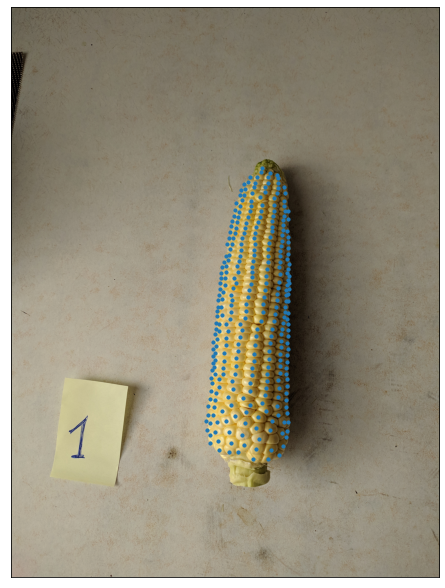

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 10.5)
# Display the image
ax.imshow(image)
ax.scatter(x_kernel,y_kernel,s=10)
#ax.set_title("")
ax.set_xticks([])
ax.set_yticks([])

In [5]:
Image.open(root_path+im_name +".png")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/hilar/Documents/Data/GitHub/Vision_Cognitive_Systems_Proyect/Corn/corn2/corn_seed_counting_train_v2_clean/train/IMG_20190831_163636.png'

In [53]:
imagen_array= np.array(imagen)

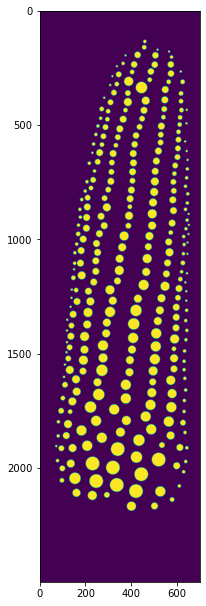

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 10.5)
# Display the image
ax.imshow(imagen_array[1000:3500,1300:2000])
#ax.imshow(imagen_array)
plt.show()

In [60]:
if (imagen_array.shape[0]*imagen_array.shape[1]- (np.count_nonzero(imagen_array==0)+np.count_nonzero(imagen_array==255))==0): 
    print("All elements are 0 or 255")

All elements are 0 or 255


In [61]:
import cv2

In [62]:
image = cv2.imread(root_path)

In [64]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

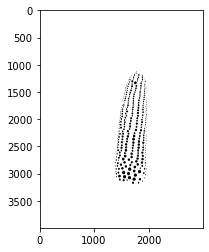

In [65]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [66]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

In [105]:
contours[0][0][0][0]

0

In [123]:
mark = 1
x = [contours[mark][i][0][0] for i in range(contours[mark].shape[0])]
y = [contours[mark][i][0][1] for i in range(contours[mark].shape[0])]

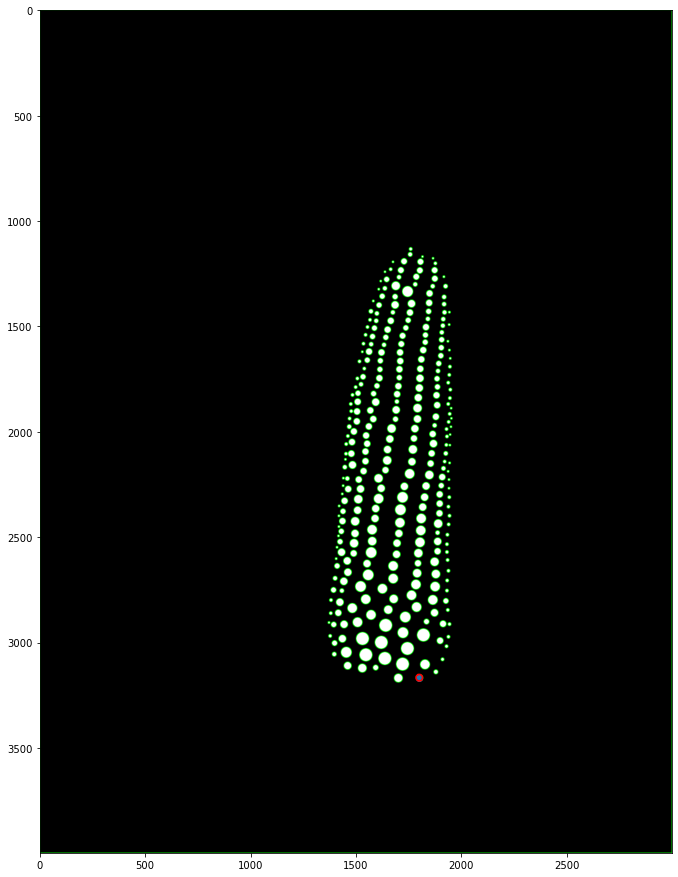

In [133]:
# show the image with the drawn contours
fig, ax = plt.subplots()
fig.set_size_inches(30.5, 15.5)
# Display the image
ax.imshow(image)
ax.plot(x,y,color="r")
plt.scatter(cx,cy)
plt.show()

In [131]:
cnt = contours[1]
M = cv2.moments(cnt)
print( M )

#Centroid
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

{'m00': 759.0, 'm10': 1366579.5, 'm01': 2403373.5, 'm20': 2460572258.333333, 'm11': 4327273986.75, 'm02': 7610328056.333333, 'm30': 4430425523897.75, 'm21': 7791402056012.5, 'm12': 13702395665428.184, 'm03': 24098394276117.75, 'mu20': 45868.58333301544, 'mu11': 0.0, 'mu02': 45868.58333301544, 'mu30': 0.001953125, 'mu21': 0.0010066032409667969, 'mu12': 0.017499446868896484, 'mu03': 0.00390625, 'nu20': 0.07962176036532266, 'nu11': 0.0, 'nu02': 0.07962176036532266, 'nu30': 1.2306246197376984e-10, 'nu21': 6.342403740884475e-11, 'nu12': 1.1026048076111767e-09, 'nu03': 2.461249239475397e-10}


In [132]:
cx

1800

In [136]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

x_kernel = []
y_kernel = []
for i in range(1,len(contours)):
    cnt = contours[i]
    M = cv2.moments(cnt)

    #Centroid
    x_kernel.append(int(M['m10']/M['m00']))
    y_kernel.append(int(M['m01']/M['m00']))

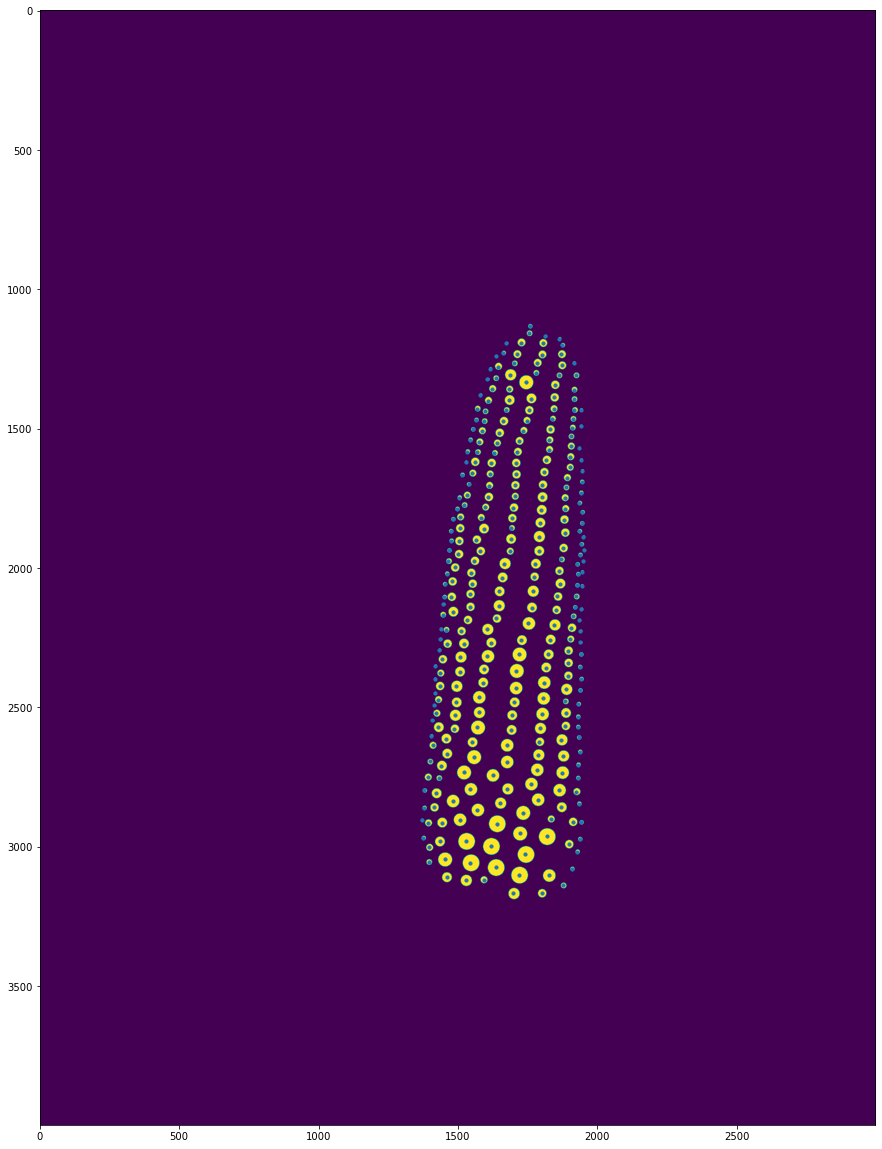

In [141]:
fig, ax = plt.subplots()
fig.set_size_inches(30.5, 20.5)
# Display the image
ax.imshow(imagen_array)
plt.scatter(x_kernel,y_kernel,s=10)
plt.show()